In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [87]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [88]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,0.067797,0.041667
1,4.9,3.0,0.067797,0.041667
2,4.7,3.2,0.050847,0.041667
3,4.6,3.1,0.084746,0.041667
4,5.0,3.6,0.067797,0.041667


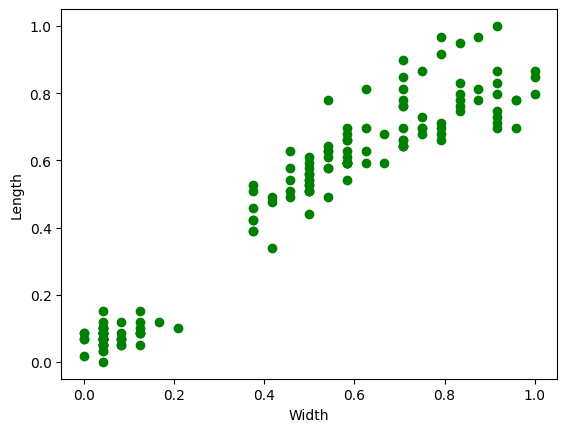

In [89]:
plt.xlabel('Width')
plt.ylabel('Length')
plt.scatter(df['petal width (cm)'],df['petal length (cm)'],c='green')

In [90]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df[['petal width (cm)','petal length (cm)']])
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [91]:
df['Predicted'] = yp

In [92]:
df1 = df[df['Predicted']==0]
df2 = df[df['Predicted']==1]
df3 = df[df['Predicted']==2]

Text(0, 0.5, 'Length')

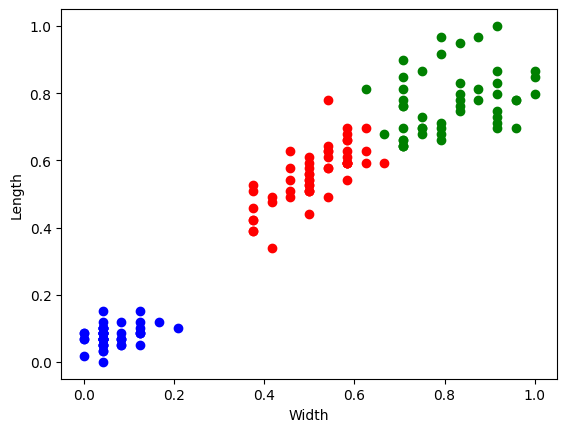

In [93]:
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'],c='green')
plt.scatter(df2['petal width (cm)'],df2['petal length (cm)'],c='blue')
plt.scatter(df3['petal width (cm)'],df3['petal length (cm)'],c='red')
plt.xlabel('Width')
plt.ylabel('Length')

In [94]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal width (cm)','petal length (cm)']])
    sse.append(km.inertia_)

In [95]:
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1682845817022391,
 0.8538617353912241,
 0.7388855104730023,
 0.5673451458363143,
 0.5065139637602201,
 0.4467594094421921]

Text(0, 0.5, 'SSE')

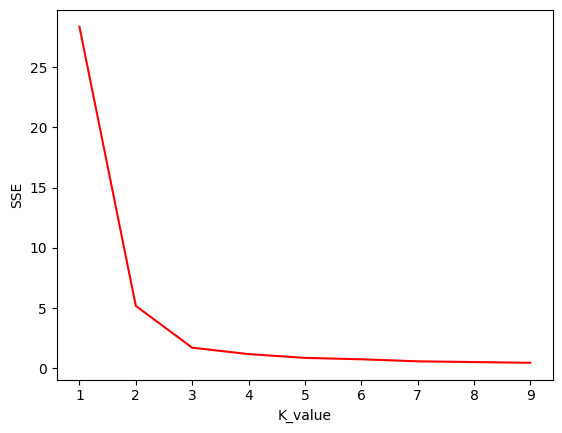

In [96]:
plt.plot(k_rng,sse,c='red')
plt.xlabel('K_value')
plt.ylabel('SSE')